In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from math import *
from numpy.random import uniform
from numba import jit

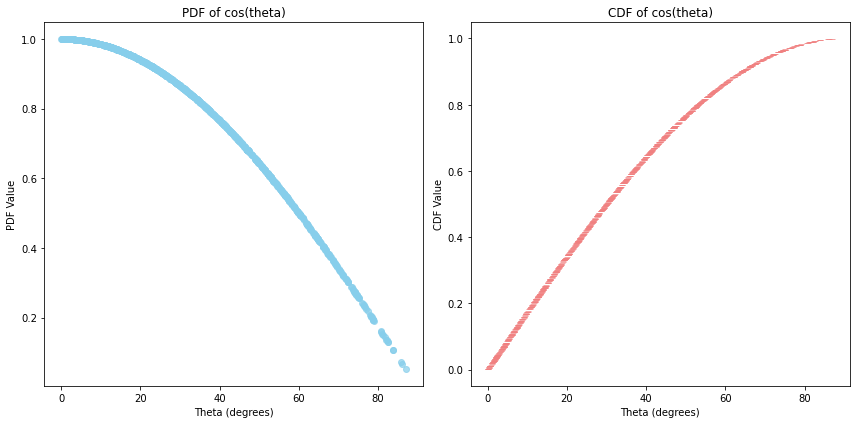

In [10]:
def pdf_cos_theta(theta):
    return np.cos(np.radians(theta))  # Probability density function of cos(theta)

def cumulative_cos_theta(theta):
    return np.sin(np.radians(theta))  # Cumulative function for cos(theta)

# Generate random numbers for y from 0 to 1
y_values = np.random.rand(1000)

# Calculate corresponding x values using the inverse of the cumulative function
theta_values = np.degrees(np.arcsin(y_values))

# Calculate the PDF values
pdf_values = pdf_cos_theta(theta_values)

# Calculate the CDF values
cdf_values = cumulative_cos_theta(theta_values)

# Plot the PDF and CDF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(theta_values, pdf_values, color='skyblue', alpha=0.7)
plt.xlabel('Theta (degrees)')
plt.ylabel('PDF Value')
plt.title('PDF of cos(theta)')

plt.subplot(1, 2, 2)
plt.plot(theta_values, cdf_values,'_', color='lightcoral', alpha=0.7 )
plt.xlabel('Theta (degrees)')
plt.ylabel('CDF Value')
plt.title('CDF of cos(theta)')

plt.tight_layout()
plt.show()

Mean of theta: 0.5674224720077747
Mean of theta1: 1.0033738547871216


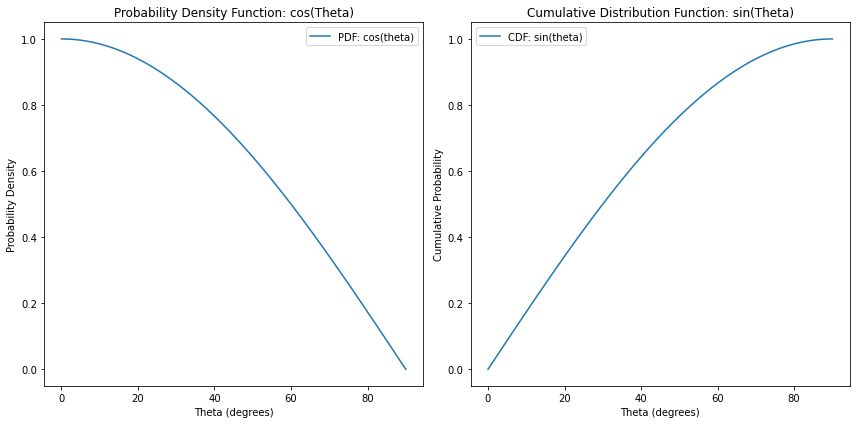

In [11]:
# Define the functions
def pdf(theta):
    return np.cos(np.radians(theta))

def cdf(theta):
    return np.sin(np.radians(theta))

# Generate random values for y0 between 0 and 1
y0 = np.random.rand(1000)

# Calculate theta using the inverse sine function
theta = np.arcsin(y0)
theta1 = np.arccos(y0)

print('Mean of theta:', np.mean(theta))
print('Mean of theta1:', np.mean(theta1))

# Plot the Probability Density Function (PDF) and Cumulative Distribution Function (CDF)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(0, 91), pdf(range(0, 91)), label='PDF: cos(theta)')
plt.xlabel('Theta (degrees)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function: cos(Theta)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(0, 91), cdf(range(0, 91)), label='CDF: sin(theta)')
plt.xlabel('Theta (degrees)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function: sin(Theta)')
plt.legend()

plt.tight_layout()
plt.show()

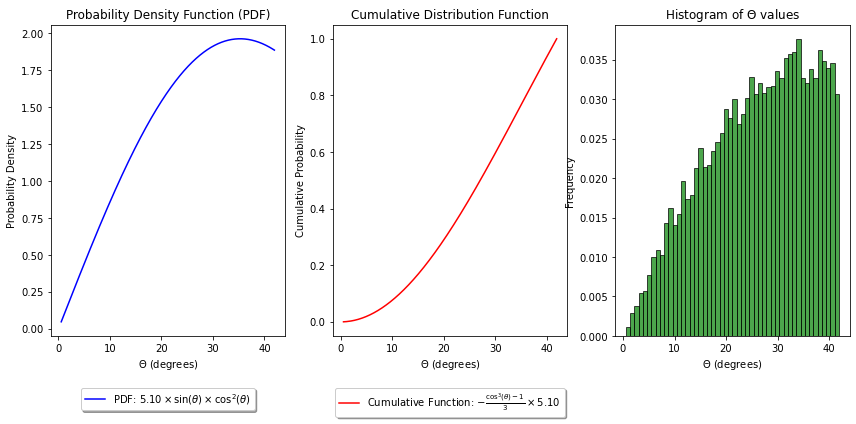

In [12]:
# Define the probability density function (pdf) and cumulative function
def pdf(theta):
    return 5.10 * np.sin(np.radians(theta)) * ((np.cos(np.radians(theta)))**2)

def cumulative_function(theta):
    return (((-(np.cos(np.radians(theta)))**3) + 1) * (5.10 / 3))

# Generate random values for y0 between 0 and 1
y0 = np.random.uniform(0, 1, 10000)

# Calculate theta using the provided formula
theta = np.degrees(np.arccos((1 - ((3 * y0) / 5.10))**(1/3)))

# Create a DataFrame to store values
df = pd.DataFrame({
    'theta': theta,
    'pdf': pdf(theta),
    'cumulative': cumulative_function(theta),
    'y0': y0
})

df = df.sort_values('theta')

# Plot the graphs for pdf and cumulative functions
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(df['theta'], df['pdf'],'-', color='blue', label=r'PDF: $5.10 \times \sin(\theta) \times \cos^2(\theta)$')
plt.xlabel(r'$\Theta$ (degrees)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)

plt.subplot(1, 3, 2)
plt.plot(df['theta'], df['cumulative'],'-', color='red', label=r'Cumulative Function: $-\frac{{\cos^3(\theta) - 1}}{{3}} \times 5.10$')
plt.xlabel(r'$\Theta$ (degrees)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)

plt.tight_layout()

# Plot the histogram of theta values
plt.subplot(1, 3, 3)
plt.hist(theta, bins=50, color='green', edgecolor='black', alpha=0.7, density=True)
plt.xlabel(r'$\Theta$ (degrees)')
plt.ylabel('Frequency')
plt.title(r'Histogram of $\Theta$ values')

plt.show()

In [44]:

# Generate theta and phi
theta_range = range(1, 44, 1)
phi_range = range(0, 361, 1)
num_points = 1000

I0 = 70.7
A0 = 1600  # m^2
E0 = 4.29  # Gev
Ec = 0.50  # Gev

# Get the second values from theta_range and phi_range
theta1 = theta_range[1] 
phi1 = phi_range[1] 

@jit(nopython=True)
def check_points_count(theta, phi):
  count = 0
  for ievt in range(num_points):
    x0_bottom, y0_bottom = uniform(0, 40), uniform(0, 40)

    if phi > 0:
      x_top = ((63 * (np.tan(np.radians(theta)))) /
               (sqrt(1 + (np.tan(np.radians(phi)))**2))) + x0_bottom

      y_top = ((63 * (np.tan(np.radians(theta))) * (np.tan(np.radians(phi)))) /
               (sqrt(1 + (np.tan(np.radians(phi))**2)))) + y0_bottom   

      if x_top >= 0 and x_top <= 40 and y_top >= 0 and y_top <= 40:
        count += 1

  ratio = count / num_points

  return theta, phi, ratio, count

# Create a list of tuples for theta and phi
theta_phi_list = [(theta, phi) for theta in theta_range for phi in phi_range]

data = [check_points_count(theta, phi) for theta, phi in theta_phi_list]

# Create a pandas DataFrame
df = pd.DataFrame(data, columns=['theta', 'phi', 'ratio', 'count'])

# Calculate I for each theta and phi
# df['I'] = ((I0 * A0 * df['ratio']) / 3) * ((E0 + Ec/E0)*2 - (E0 + Ec/1000 + E0)2) * ((df['theta'])3 - (theta1)*3) * (df['phi'] - phi1)
df['I'] = ((I0 * A0 * df['ratio']) / 3) * ((E0 + Ec/E0)*2 - np.power((E0 + Ec/1000 + E0), 2)) * np.power((df['theta'] - theta1), 3) * (df['phi'] - phi1)

# Read the DataFrame
df.to_csv('Datas.csv', index=True)
df.head()

,theta,phi,ratio,count,I
0,1,0,0.000,0,-0.000000e+00
1,1,1,0.976,976,0.000000e+00
2,1,2,0.969,969,2.368081e+06
3,1,3,0.974,974,4.760600e+06
4,1,4,0.975,975,7.148232e+06


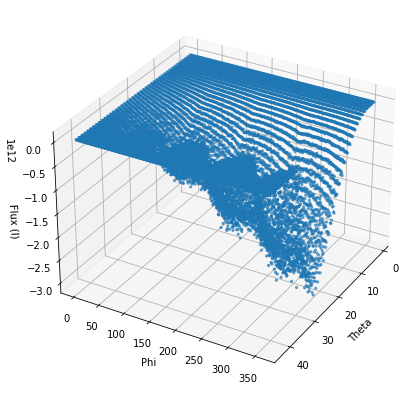

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['theta'], df['phi'], df['I'], marker='.')

ax.set_xlabel('Theta')
ax.set_ylabel('Phi')
ax.set_zlabel('Flux (I)')

ax.view_init(30, 30)

plt.show()

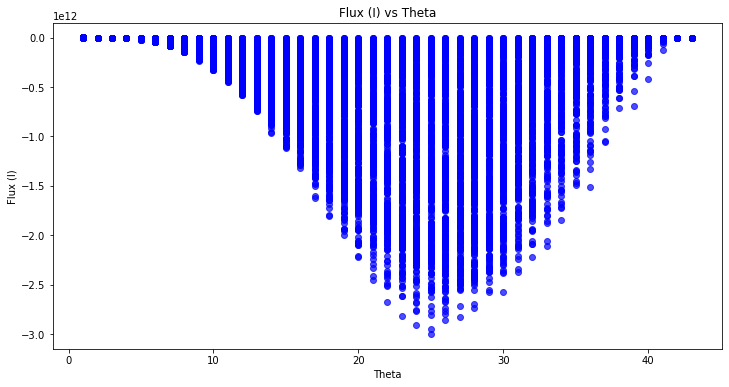

In [46]:
# Plot I vs theta
plt.figure(figsize=(12, 6))
plt.plot(df['theta'], df['I'], 'o', color='blue', alpha=0.7)
plt.xlabel('Theta')
plt.ylabel('Flux (I)')
plt.title('Flux (I) vs Theta')
plt.show()
